<a href="https://colab.research.google.com/github/tiasnyder/PHYS250/blob/main/Tia_Snyder_Lab07_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 07: Numerical Integration

* There are many techniques for implementing numerical integration.  In this lab, you will write code to implement the trapezoid method of integration.

* You will use this function to calculate the integral in several different physical situations.

* You will compare your function with python's built-it numerical integrators.

In [1]:
# import your modules here
import numpy as np
from matplotlib import pyplot as plt
import math

# Part 1: Write a Function to Implement the Trapezoid Integration Method

(5 points)

Write a function called **trap** that does the following.

Input:
* array of y values
* array of x values, spanning from from xmin to xmax


Function should integrate using the trapezoid method.

Return:
* the integral of $f(x)$ between xmin and xmax

In [2]:
# write your function here
def trap(x,y):
  area = 0
  for i in range(1,len(x)):
    area += 0.5*(y[i-1]+y[i])*(x[i]-x[i-1])
  return area

# Part 2:  Calculate the Area Under the Half Circle

(10 points)

In the pre-lab assignment, we estimated the area of a half circle using the trapezoid method.

The general equation for a circle is:

$$ r^2 = x^2 + y^2 $$

For a circle of $r=2$, we can solve for the y coordinate:

$$ f(x) = y = \sqrt{2^2 - x^2} $$.


### Write a function to return the y values of your circle

* In the first cell below, write a function called **mycircle** that returns the y value of the circle.

* let the radius be an optional argument, and set the default value to $r=2$.






In [7]:
# write your function mycircle here
def mycircle(x,r=2):
  y = np.sqrt(r**2 - x**2)
  return y

### Calculate the area under the half circle using integration

* In the next cell, set up an array of x values with $-2 \le x \le 2$, with 100 divisions between $-2$ and $2$.  
* Calculate the corresponding y values using your **mycircle** function.

* Then use your **trap** function to calculate the area under the circle.

* Print the value of your area using a formatted print statement.  Print five decimal places.

In [13]:
x = np.linspace(-2,2,100)
r = 2

circle_y = mycircle(x,r)
trap_area = trap(x,circle_y)

print(f"The area under the circle using the trapezoid method is: {trap_area:.6}")

The area under the circle using the trapezoid method is: 6.27644


### Determine the Accuracy of Your Integral

* Compare your answer with the accepted value of the integral.

* Calculate and print your percent error.

In [17]:
expected = 0.5*np.pi*r**2
error = ((expected - trap_area) / expected)*100

print(f"The percent error is: {error:.2f}%")

The percent error is: 0.11%


### The impact of the spacing in the x array

* Repeat your above calculations, but divide the region $-2 \le x \le 2$ into 1000 steps.

* You can copy all of the necessary code into one cell to simplify your calculation.

* **SUMMARY**: describe how the accuracy of your integral changes as the size of the steps in the x direction decreases?

**YOUR ANSWER HERE**



In [18]:
x = np.linspace(-2,2,1000)
r = 2

circle_y = mycircle(x,r)
trap_area = trap(x,circle_y)

print(f"The area under the circle using the trapezoid method is: {trap_area:.6}")

expected = 0.5*np.pi*r**2
error = ((expected - trap_area) / expected)*100

print(f"The percent error is: {error:.2f}%")

The area under the circle using the trapezoid method is: 6.28297
The percent error is: 0.00%


# Part 3: Integral of the Gaussian Distribution

(10 points)

The gaussian function (aka normal distribution) is:
$$  f(x) = \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{1}{2}\left(\frac{x-\bar{x}}{\sigma}\right)^2} $$

where:
* $\bar{x}$ is the average of a distribution
* $\sigma$ is the standard deviation of the distribution


Write a function **mygauss** that does the following:

* Input
  * x
  * mean
  * sigma

* calculate $f(x)$

* Return
  * $f(x)$




In [19]:
def mygauss(x,mean,sigma):
  y = (1 / (np.sqrt(2*np.pi)*sigma)) * np.exp(-0.5*((x - mean)/sigma)**2)
  return y

### Integrate your gaussian

* write code to integrate the gaussian between:
* $ -\sigma \le x \le \sigma $

* Compare your results with the expected answer, and calculate your percent error.

* If you are not sure what the expected answer is, [look here](https://en.wikipedia.org/wiki/Normal_distribution)

In [25]:
mean = 0
sigma = 1
x = np.linspace(-sigma,sigma,100)

measured_array = mygauss(x,mean,sigma)
measured = trap(x,measured_array)
expected = .682

print(f"The measured value of the Gaussian Distribution is: {measured:.6f}")

error = np.abs(((expected - measured) / expected) * 100)
print(f"The percent error is: {error:.2f}%")

The measured value of the Gaussian Distribution is: 0.682673
The percent error is: 0.10%


Calculate the integral for:
* $ -2\sigma \le x \le 2\sigma $

and compare with the accepted answer.

In [26]:
mean = 0
sigma = 1
x = np.linspace(-2*sigma,2*sigma,100)

measured_array = mygauss(x,mean,sigma)
measured = trap(x,measured_array)
expected = .954

print(f"The measured value of the Gaussian Distribution is: {measured:.6f}")

error = np.abs(((expected - measured) / expected) * 100)
print(f"The percent error is: {error:.2f}%")

The measured value of the Gaussian Distribution is: 0.954470
The percent error is: 0.05%


Calculate the integral for:
* $ -3\sigma \le x \le 3\sigma $

and compare with the accepted answer.

In [27]:
mean = 0
sigma = 1
x = np.linspace(-3*sigma,3*sigma,100)

measured_array = mygauss(x,mean,sigma)
measured = trap(x,measured_array)
expected = .996

print(f"The measured value of the Gaussian Distribution is: {measured:.6f}")

error = np.abs(((expected - measured) / expected) * 100)
print(f"The percent error is: {error:.2f}%")

The measured value of the Gaussian Distribution is: 0.997292
The percent error is: 0.13%


# Part 4: Using Python Built-In Functions
(5 points)

* Let's revisit parts 1 and 4 and use python's built-in functions to complete the integration.

* You can use the ```scipy.integrate.trapezoid``` function to perform your integration.

In [36]:
# import scipy.integrate.trapezoid
from scipy.integrate import trapz

# set up x and y arrays for the half circle
x = np.linspace(-2,2,1000)
y = mycircle(x)

# call scipy.integrate.trapezoid to perform the integration
integration = np.trapz(y,x)

# print your result and the expected answer in a formatted print statement
print(f"The integration is: {integration:.2f}")

expected = 0.5*np.pi*r**2
print(f"The expected value is: {expected:.2f}")

The integration is: 6.28
The expected value is: 6.28


In [37]:
# import scipy.integrate.trapezoid

# set up x and y arrays for the gaussian
x = np.linspace(-sigma,sigma,100)
y = mygauss(x,mean,sigma)

# call scipy.integrate.trapezoid to perform the integration between $-1\sigma \le x \le 1\sigma$.
integration = np.trapz(y,x)
# print your result and the expected answer in a formatted print statement
print(f"The integration is: {integration:.2f}")

expected = .682
print(f"The expected value is: {expected:.2f}")

The integration is: 0.68
The expected value is: 0.68


# Part 5: Calculating Area Using Monte Carlo

(10 points)

* On paper or the whiteboard, develop pseudo code for a function that will calculate the area of the half circle using the Monte Carlo method.
* Check this with your instructor, and discuss how you could generalize this for any function.
* Write your function **mcintegrate** in the cell below.
* Your function should have an optional input argument, **visualize**, with a default value of ```False```.  If ```visualize=True```, your function should create a plot that shows:
  * the function being integrated with a black solid line;
  * the points that fall below the function as blue circles;
  * the points that fall above the function as red circles;
  * a title that reports the area.



In [63]:
# your monte carlo function here
def mcintegrate(visualize=False):
  xrandom = np.random.uniform(low=-2,high=2,size=1000)
  yrandom = np.random.uniform(low=0,high=2,size=1000)

  plt.figure()

  # plot the random points in the range
  # plt.plot(xrandom,yrandom,"bo")

  x = np.linspace(-2,2,1000)
  y = mycircle(x)

  # plot the curve in black
  plt.plot(x,y,"k",linewidth=4)

  ytest = mycircle(xrandom)

  for i in range(len(xrandom)):
    if (yrandom[i] < ytest[i]):
      plt.plot(xrandom[i],yrandom[i],"bo")
    elif (yrandom[i] > ytest[i]):
      plt.plot(xrandom[i],yrandom[i],"ro")
  return

### Running Your Monte Carlo Integration Function

* Use your function for integrating the area under the curve in Part 1.
* Set ```visualize=True``` to see make sure your function is behaving as expected.

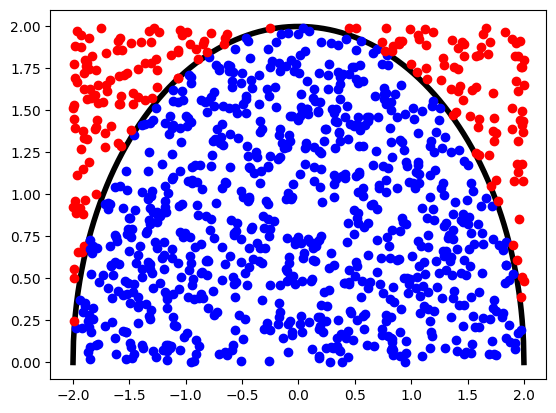

In [64]:
# your code to calculate the area of a half circle using monte carlo
area = mcintegrate(visualize=True)